In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv('tweets.csv')

In [4]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [10]:
#Plotting airline counts
ct_airline=dict(data.airline.value_counts())
ct_airline

{'United': 3822,
 'US Airways': 2913,
 'American': 2759,
 'Southwest': 2420,
 'Delta': 2222,
 'Virgin America': 504}

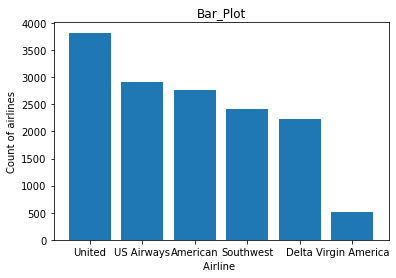

In [12]:
plt.bar(ct_airline.keys(),ct_airline.values())
plt.xlabel('Airline ')
plt.ylabel('Count of airlines')
plt.title('Bar_Plot')
plt.show()

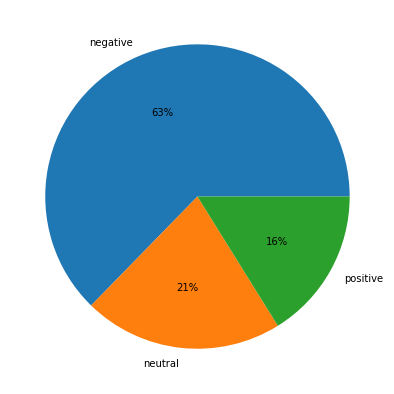

In [13]:
ct_tweets=dict(data.airline_sentiment.value_counts())
#col=list(ct_tweets.keys)
plt.figure(figsize=(7,7))
plt.pie(ct_tweets.values(),labels=list(ct_tweets.keys()),autopct='%1.0f%%')
plt.show()

<Figure size 1440x1440 with 0 Axes>

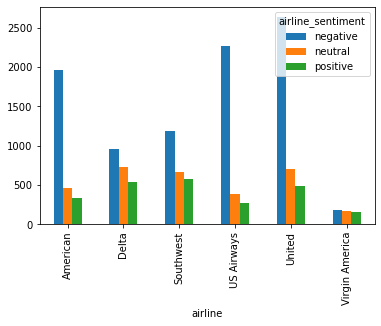

In [29]:
plt.figure(figsize=(20,20))
grpby_tweets=data.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
(grpby_tweets).plot(kind='bar')

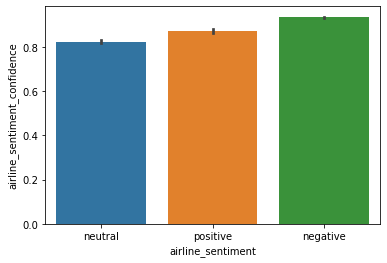

In [18]:
#confidence of each sentiment tweet
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=data)

In [58]:
#Plotting all the negative reasons count

color=sns.color_palette("husl", 10)
neg_data=data.groupby(['airline','negativereason']).negativereason.count().unstack(level=0)

In [59]:
neg_data

airline,American,Delta,Southwest,US Airways,United,Virgin America
negativereason,,,,,,
Bad Flight,87,64,90,104,216,19
Can't Tell,198,186,159,246,379,22
Cancelled Flight,246,51,162,189,181,18
Customer Service Issue,768,199,391,811,681,60
Damaged Luggage,12,11,14,11,22,4
Flight Attendant Complaints,87,60,38,123,168,5
Flight Booking Problems,130,44,61,122,144,28
Late Flight,249,269,152,453,525,17
Lost Luggage,149,57,90,154,269,5


In [69]:
#we can use label encoder too.
data['airline_sentiment'].replace(('neutral', 'positive', 'negative'), (0, 1, 2), inplace=True)
data['airline_sentiment'].value_counts()

2    9178
0    3099
1    2363
Name: airline_sentiment, dtype: int64

In [121]:
import numpy as np
target=data.iloc[:,1].values
features=data.iloc[:,10].values
features[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [122]:
len(features[1])

72

In [116]:
new_feature=[]
for i in range(len(features)):
    s=features[i]    
    i=' '.join([word for word in s.split() if len(word)>3])
    feature=re.sub(r'\W', ' ',i) #replace special characters like !,',#
    feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', feature) #Replace single character with space
    feature=re.sub(r'\s+', ' ', feature, flags=re.I)#replace multiple space with single space
    feature=feature.lower()
    new_feature.append(feature)
    
new_feature

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials experience tacky ',
 ' virginamerica didn today must mean need take another trip ',
 ' virginamerica it really aggressive blast obnoxious entertainment your guests faces amp they have little recourse',
 ' virginamerica it really thing about',
 ' virginamerica seriously would flight seats that didn have this playing it really only thing about flying',
 ' virginamerica yes nearly every time this ear worm won away',
 ' virginamerica really missed prime opportunity without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but',
 ' virginamerica amazing arrived hour early you re good',
 ' virginamerica know that suicide second leading cause death among teens 10 24',
 ' virginamerica lt 3 pretty graphics much better than minimal iconography ',
 ' virginamerica this such great deal already thinking about trip australia amp haven even gone trip yet ',
 ' virginamerica virginmedia flying your 

In [ ]:
new_feature[2]

In [177]:
from nltk.stem import WordNetLemmatizer

In [178]:
lemmatizer = WordNetLemmatizer()
new_feature_=[]
for i in new_feature:
    lemma_words =' '.join(lemmatizer.lemmatize(w) for w in i.split())
    new_feature_.append(lemma_words)

In [179]:
new_feature_

['virginamerica what dhepburn said',
 'virginamerica plus you ve added commercial experience tacky',
 'virginamerica didn today must mean need take another trip',
 'virginamerica it really aggressive blast obnoxious entertainment your guest face amp they have little recourse',
 'virginamerica it really thing about',
 'virginamerica seriously would flight seat that didn have this playing it really only thing about flying',
 'virginamerica yes nearly every time this ear worm won away',
 'virginamerica really missed prime opportunity without hat parody there http co mwpg7grezp',
 'virginamerica well didn but',
 'virginamerica amazing arrived hour early you re good',
 'virginamerica know that suicide second leading cause death among teen 10 24',
 'virginamerica lt 3 pretty graphic much better than minimal iconography',
 'virginamerica this such great deal already thinking about trip australia amp haven even gone trip yet',
 'virginamerica virginmedia flying your fabulous seductive sky agai

In [ ]:
#convert text into vectors.I have used Tf-idf(kinda of feature extraction)

In [ ]:
#TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

#TF = (Frequency of a word in the document)/(Total words in the document) 
#IDF = Log((Total number of docs)/(Number of docs containing the word))

In [180]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
transformed_features = vectorizer.fit_transform(new_feature_).toarray()


In [181]:
transformed_features[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix as cm, accuracy_score as acc

In [183]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features, target, test_size=0.2, random_state=0)


In [ ]:
#Logistic Regression

In [184]:
log_model =LogisticRegression()
log_model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
log_pred = log_model.predict(X_test)

In [186]:
print('Confusion matrix: \n',cm(y_test,log_pred))
print('Classification report: \n',classification_report(y_test,log_pred))
print('Accuracy:',acc(y_test, log_pred))

Confusion matrix: 
 [[ 318   35  261]
 [  61  265  118]
 [ 116   32 1722]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       614
           1       0.80      0.60      0.68       444
           2       0.82      0.92      0.87      1870

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

Accuracy: 0.7872267759562842


In [187]:
LR_data=pd.DataFrame([y_test,log_pred])
LR_data

,0,1,2,3,4,5,6,7,8,9,...,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927
0,2,2,2,2,2,0,2,2,2,2,...,2,0,0,2,0,2,2,2,2,2
1,2,2,2,2,1,0,0,2,2,2,...,2,0,0,2,1,2,2,2,2,2


In [ ]:
#

In [188]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [189]:
RF_pred= RF_classifier.predict(X_test)

In [191]:
print('Confusion matrix: \n',cm(y_test,RF_pred))
print('Classification report: \n',classification_report(y_test,RF_pred))
print('Accuracy:',acc(y_test, RF_pred))

Confusion matrix: 
 [[ 258   37  319]
 [  64  227  153]
 [ 102   33 1735]]
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.42      0.50       614
           1       0.76      0.51      0.61       444
           2       0.79      0.93      0.85      1870

    accuracy                           0.76      2928
   macro avg       0.72      0.62      0.65      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy: 0.7581967213114754


In [192]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [193]:
NB_pred = NB_model.predict(X_test)

In [194]:
print('Confusion matrix: \n',cm(y_test,NB_pred))
print('Classification report: \n',classification_report(y_test,NB_pred))
print('Accuracy:',acc(y_test, NB_pred))

Confusion matrix: 
 [[ 196   22  396]
 [  34  185  225]
 [  38    9 1823]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.32      0.44       614
           1       0.86      0.42      0.56       444
           2       0.75      0.97      0.85      1870

    accuracy                           0.75      2928
   macro avg       0.78      0.57      0.62      2928
weighted avg       0.76      0.75      0.72      2928

Accuracy: 0.7527322404371585
